# 3 - Mel-Frequency Cepstral Coefficients
## Mel-Frequency Cep-WHAA??
Uhh yeah, pretty much what the title says lol.

![](http://p.fod4.com/p/media/5c597eb60b/uF9MjJo3QIaijySXC4iL_Confused%20Christian%20Bale.gif)

Okay, let's back up about 3 days. I've been doing a bit of light research on how to meaningfully extract features out of a song. In fact, this can probably be generalized to sounds in general because I'm by no means an expert on any of this and I'm just scratching the surface of signal processing for audio, period.

Last post, I hand-picked a few songs of different genres to look at. I looked at 3 plots, the spectrogram, the chromagram, and the tempogram. The spectrogram gives us a sense of treble and bass, the chromagram gives us a sense of the key of the song, and the tempogram gives us a sense of... well, the tempo.

I saw how, for songs with more of a synthesized sound (techno, hip hop), the chromagram had a lack of focus for tones and keys. Synthesized sounds also unnaturally organized the spectrogram into treble and bass regions due to the ability to perform digital filtering. The tempogram gave us information about either how consistent tempo was in the song or how cleanly a tempo-setting instrument could be deciphered. This is all fine and dandy, but what exactly will the features of our model be?

In the spectrogram and chromagram world, what exactly are we going to map as features? A few thoughts that came to my head were:
- _**Frequency Distribution**_: We saw techno and hip hop had really hard hitting bass, so maybe something really elementary we can do is measure how heavy the bass is in any given song. Sames goes for trebles and mids. How exactly do we do this? Do we bucket together certain frequencies? How do we decide what these buckets are?
- _**Keys**_: We saw that techno and hip hop often times lacked the melody and tone to be able to assign a key to songs, but even for other genres, any song can really be sung in any key... does the key really matter? Also, how do we even find the key? Will I have to do more research? Can librosa determine the key for me?
- _**Tempo**_: Even without doing any more deep dives into songs, I already know that House music lives in the 120 - 130 BPM and R&B often times is much slower, so maybe straight BPM can be a feature. One other thing we did notice, though, was that how "clean" or "consistent" a tempo is in a song often dictated genres as well. E.g. Techno music is generally quantized to a beat from a computer's clock / metronome, whereas Jazz was often a bit less consistent because of the mood of the music and analog nature of the instruments involved. How do we measure this, though?

This post will be concentrated on _**frequency distribution**_ because, well, it's one hell of a topic...

## Frequency Distribution - MFCC
How do we measure which frequencies exist in a song? Frequencies can pop up anywhere at any time. We saw in Dancing! (under the Dance / Techno category in the last post) that the intro had no bass whatsoever, but immediately after the intro, we had very heavy bass. For Techno, we would hope to see heavy bass in whatever method we use to track the footprint of frequencies. Timing is another thing that comes to my mind, though. What if we took the same sequences of verses, buildups, and drops from Dancing! and just switched them around. They would be a different song, but should still have that techno feel. At the end of the day, we simply want to categorized the genres and not the song itself.

After 3 days of light research, let's fast forward back to the Mel-Frequency Cepstrum Coefficient (MFCC). This seems to be a very popular method of characterizing frequencies in _**speech**_ recognition systems, and it also seems to be gaining traction in the music world. It's quite the journey to understand exactly what an MFCC represents, but I will try my best to capture everything (that I understand). MFCCs consist of a few major steps, all of which are summed up up in the figure below:

<img src="https://image.jimcdn.com/app/cms/image/transf/none/path/sf1ff7ca1dd72191f/image/ib751b6262352cb2a/version/1453992968/image.png" style="width: 700px;"/>

### Frame Signal
The first step is to divide the signal into multiple frames. I believe this is done to break the signal into more consistent bits. In the speech world, I remember reading that the signal is divided into frames of tens of milliseconds so the frequency spectrum of a consistent soundbyte can be captured. If we were to capture the frequency spectrum of an entire word, we lose the sense of time and the words "hello" and "olleh" would have the same frequency response (at least if you literally took the waveform and inversed it).

### Window Frame
For each frame, we multiply it by a window function. This simply suppresses the edges of the waveform. This helps capture the true frequency of the waveform because a regular sine wave looks like this and it's quite easy to extract the frequency response from it:

![](https://betterexplained.com/wp-content/uploads/sine/sine-plot.gif)

Because we are somewhat arbitrarily dividing the waveform up into set frames, the waveform at time 0 will not always start at 0 amplitude. If we had cut it off such that the resulting amplitude at time 0 created a cosine wave, there would actually be a sudden jump from an amplitude from 0 to 1, and this may yield some unexpected / unwanted frequencies in the frequency response.

![](http://www.differencebetween.info/sites/default/files/images/5/cosinewave.jpg)

### FFT
No explaination needed here... get the freqeuncy response.

### Mel Filterbank
This one took me a bit of time to understand. To understand the Mel filterbank, we have to understand the context of why it exists and its relation back to the cochlea. Remember in the first post, we had established that humans hear from airwaves vibrating our tympanic membrane, which vibrate the liquid in our cochlea and sends a signal to our brains. That signal is generated when the liquid in the cochlea resonates with little hairs in our cochlea. Each hair at a different depths of our cochlea resonate with different frequencies and send different signals to our brain, and this is how we psychologically distinguish between different tones.

Now, through historical experiments, researchers have actually determined we can distinguish better between tones in the lower frequencies than higher frequencies. I remember reading that we have less cochlea hair cells in the higher frequency ranges, thus we perceive less resolution in that range. Researchers have created the Mel filterbank as one of the standards today to represent human hearing accurately. The Mel filterbank looks something like this:

<img src="https://i.stack.imgur.com/Q0UUw.png" style="width: 700px;"/>

The Mel filterbank allows us to capture the spectral envelope (the general shape of the frequency response) by measuring the energy within these banks and translating them into coefficients. Here, we would get 12 coefficients because we have 12 banks, and notice we have more coefficients representing lower frequencies than higher ones. In fact, much wider ranges of the higher frequencies are represented by a single coefficient, whereas the resolution between the different lower frequency banks are higher.

### Log
The tones that we hear (e.g. from a chromagram) are exponentially increasing in frequency:

![](http://1.bp.blogspot.com/-qWWThFO-7T0/UtioxGbkZRI/AAAAAAAACXk/Sts47OtfGmY/s1600/fundamental_freqs.png)

Even if we just look at the C's, the frequency _**doubles**_ every time we go up an octave. The log transform of the Mel coefficients evens out the scale here. That is all.

### DCT & Lift
This step was perhaps the most confusing for me. That largely stemmed from me not knowing what a DCT (Discrete Cosine Transform) was lol. That'll do you in, won't it haha. Let's start with that first. The DCT is similar to a Fourier Transform in that it tries to map a signal with oscillating signals, in this case, a cosine wave. This video does a great job in explaining the DCT and how it's used for JPEG compression:

[![](https://img.youtube.com/vi/Q2aEzeMDHMA/0.jpg)](https://www.youtube.com/watch?v=Q2aEzeMDHMA).

This [stackexchange answer](https://dsp.stackexchange.com/questions/31/how-do-i-interpret-the-dct-step-in-the-mfcc-extraction-process) also does a good job of contextualizing it with the rest of the MFCC process. In short, we are using the DCT to compress the signal, then we use a lift function to enhance the response.

## Librosa MFCC
Let's see what librosa can do for us in terms of MFCC

In [22]:
# Enable plots in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Seaborn makes our plots prettier
import seaborn
seaborn.set(style = 'ticks')

# Import the audio playback widget
from IPython.display import Audio

import numpy as np
import pandas as pd
import librosa
import librosa.display

import sklearn.preprocessing

In [2]:
# Load example file
example_filepath = librosa.util.example_audio_file()
y, sr = librosa.load(example_filepath)

In [17]:
# Generate MFCC
mfcc = librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 10)

In [20]:
print mfcc.shape

(10, 2647)


Ok, so I asked for 10 MFCC's, and there we see the 10, but that second number is quite big... 2647. I think that indicates the number of frames we took.

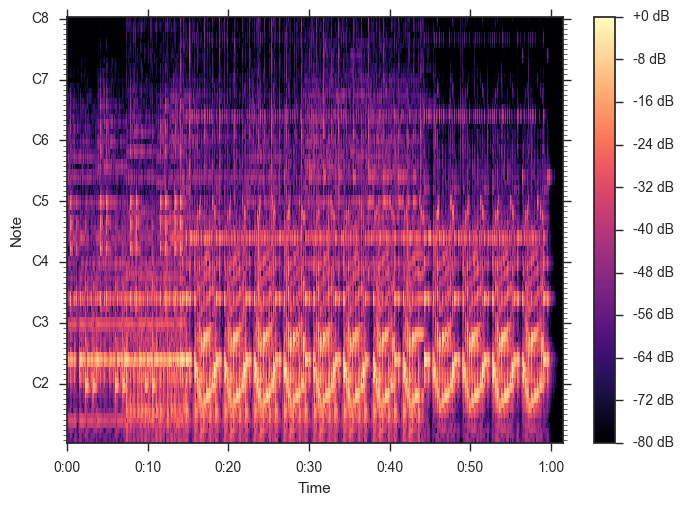

In [21]:
# Calculate short-time Fourier transform
example_cqt = librosa.cqt(y)

# Plot spectrogram
librosa.display.specshow(librosa.amplitude_to_db(example_cqt, ref = np.max), x_axis = 'time', y_axis = 'cqt_note')
plt.colorbar(format='%+2.0f dB')

Even on a spectrogram, we see our x-axis divided into frames and then each frame converted to a frequency response. Our MFCCs (I think) are not much different, except that the x-axis is MFCC amplitude rather than the notes on this Constant-Q transform.

In [24]:
# Scale to mean zero and unit variance
mfcc_scaled = sklearn.preprocessing.scale(mfcc, axis=1)

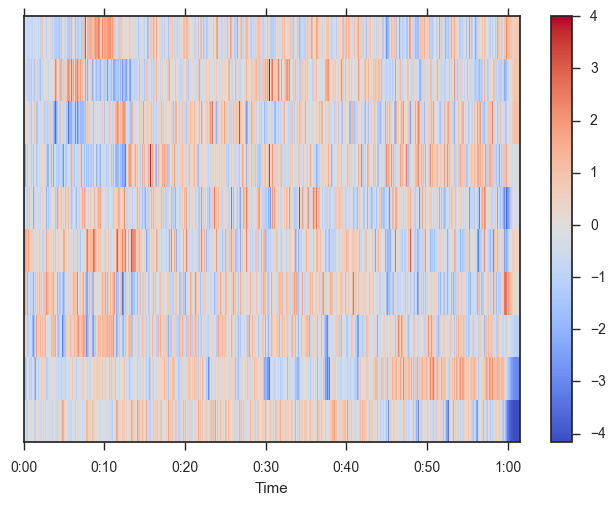

In [27]:
# Show MFCC plot
librosa.display.specshow(mfcc_scaled, sr = sr, x_axis = 'time')
plt.colorbar()

Okay, it's getting interesting. From our initial analysis of the example librosa song in post \#1, we saw there are 5 distinct phases in the song:
- 0:00 - 0:07
- 0:07 - 0:15
- 0:15 - 0:30
- 0:30 - 0:45
- 0:45 - 1:00

It's a bit alarming to me that certain coefficients (coefficients line up the y-axis here, there are 10 coefficients) are dark blue in certain parts of the song and dark red in other parts... if I'm trying to classify this song in general, you'd hope that you'd see a pattern of some sort... I can't say that there _**isn't**_ a pattern, but I can say that there isn't one that my eyes can detect right away.

If you watched the DCT video above, you'd see that the first DCT coefficient is representing the waveform with just a constant value, no cosine wave. I've read in some papers that the first coefficient somewhat represents pitch, while the remaining coefficients actually tell us more about the shape of the spectral envelope rather than general offset. Is this more important for music genre detection? I don't know! I'm not a researcher! Far from it. I'll keep them all in for now and keep this as a parameter to tweak later on if I'm experiencing poor results.

One more thing that does alarm me, though. This is a single song, but we've split it up into 2647 frames. In essence, we have 2647 training samples relating to a _**single song**_. I thought this exercise might be as simple as each song having one set of input features, but I'm not quite sure if that's the case anymore.

After googline a tremendous amount, I came across a [MIR (Music Information Retrieval) page](http://musicinformationretrieval.com/genre_recognition.html) that literally is doing what I'm trying to do lol... jesus... if only I had found this page a week ago. Is this site credible? It looks like this page is used as the outline for the annual Summer Workshop on Music Information Retrieval at CCRMA @ Stanford. Other than the fact that it's just random Jupyter notebooks and pages hosted in Github pages, it seems pretty decent! It looks like it's managed by a [Steve Tjoa](https://stevetjoa.com/) who teaches at Stanford, so yes, I will choose to trust this source haha.

In this genre recognition notebook by Steve Tjoa, he uses _**each individual frame**_ of a song as a training sample. He trains on 2 minutes of a song and gathers roughly ~5000 framed samples per song. He then tests on a sample of 10 second extracts of songs consisting of ~430 frames per song. The kicker here is he _**actually classifies all 430 frames in each song**_. So we are not only training and testing on songs at this point, but we're actually training and testing _**frames of songs**_. Crazy stuff. He has some logic at the end there that aggregates votes and selects the most common vote.

## Conclusion
I have a much better idea of the features I need now. I know that I had planned to explore _**keys**_ and _**tempo**_ in addition to the frequency distribution, but this seems like enough of a handful that I'm just going to train a model based on MFCCs and see what happens.

There are a few differences between what Steve Tjoa does in his notebook and what I want to do, so I'll spend the next post reviewing some of those differences and putting together a script.